In [1]:
import requests
import matplotlib.pyplot as py_plot
import pandas as pd
from IPython.display import display, HTML
from pyproj import Proj, transform
import folium
from folium import plugins
import math

#url from api explorer tab in open data platform
api_url = 'https://services5.arcgis.com/54falWtcpty3V47Z/arcgis/rest/services/cad_calls_year3/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

#function to return a list of column headers and rows of data from the json api call
def opendata_api(api_call):
    n = 0
    all_data = []
    call_count = requests.get(api_call,"&returnCountOnly=true").json()
    count = call_count['count']
    loop_count = math.ceil(count/1000)

    for x in range(loop_count):
        call_json = requests.get(api_call,'&resultOffset='+str(n)).json()

        calls_feats = call_json["features"]
        for line in calls_feats:
            all_data.append(line['attributes'])
        n+=1000
    
    #return the keys of the first dictionary get column names
    fields = list(all_data[0].keys())

    #a list comprehension to populate a list of attributes into the list we are building called rows
    rows = [list(item.values()) for item in all_data]
    return rows,fields

columns = opendata_api(api_url)[1]
data = opendata_api(api_url)[0]

print(columns)



['OBJECTID', 'Record_ID', 'Call_Type', 'Description', 'Reporting_Officer', 'Unit_ID', 'Report_Created', 'Location', 'Police_District', 'Beat', 'Grid', 'X_Coordinate', 'Y_Coordinate', 'Day_of_Week', 'Occurence_Date', 'Occurence_Time', 'Received_Date', 'Received_Time', 'Dispatch_Date', 'Dispatch_Time', 'Enroute_Date', 'Enroute_Time', 'At_Scene_Date', 'At_Scene_Time', 'Clear_Date', 'Clear_Time']


In [2]:
#a list comprehension to populate a list of attributes into the list we are building called data
#data = [list(row['attributes'].values()) for row in listOfDicts]
        
print(data[0:5])

[[1, '6360891', '415E', 'DISTURBANCE-NOISE', '0883', '2C14', 'N', '4101 INNOVATOR DR', '1', '1A', '0336', 6700606, 1996674, 'Sun', 1483228800000, '18:40:50', 1483228800000, '18:40:50', 1483228800000, '18:49:57', 1483228800000, '18:50:12', 1483228800000, '18:57:57', 1483228800000, '19:06:44'], [2, '6360930', '927P', 'SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS', '0694', '1C12', 'N', '2941 ADVANTAGE WAY', '1', '1A', '0313', 6696606, 2000630, 'Sun', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:45:17', 1483228800000, '19:47:44'], [3, '6361374', 'TSTOP', 'TRAFFIC STOP', '552', 'XRY12', 'N', '2ND ST / NEASHAM CIR', '3', '3M', '0751', 6703083, 1973628, 'Sun', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:14:48', 1483228800000, '19:20:08'], [4, '6361293', 'AU', 'ALL UNITS BROADCAST', '', '', 'N', '636 TENAYA AVE', '1', '1C', '0418', 

In [3]:
#building a pandas dataframe called "calls"
calls = pd.DataFrame.from_records(data, columns=columns)

#returns the counts for each unique value in the "Description" field
display(calls['Description'].value_counts())

DISTURBANCE-CLARIFY                                  9289
TRAFFIC STOP                                         7805
SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS          4809
ALL UNITS BROADCAST                                  4547
SUBJECT STOP                                         4036
SUSPICIOUS OCCUPIED VEHICLE                          4026
WELFARE CHECK                                        3573
INCOMPLETE CALL FOR POLICE                           3008
ALARM-SECURE NO EVID OF CRIME                        2039
ERRAND                                               1428
MISDEMEANOR ASSAULT-IN PROGRESS                      1409
REPORT NUMBER ASSIGNMENT                             1394
ALARM-CANCEL                                         1365
VEHICLE ACCIDENT-NO OR UNKNOWN INJURIES              1328
BUSINESS CHECK                                       1300
CHECK ON HAZARD                                      1166
ALARM-ACCIDENTAL                                     1143
DISTURBANCE-FA

In [4]:
#describe method on the "description" field
calls['Description'].describe()

count                   76569
unique                    177
top       DISTURBANCE-CLARIFY
freq                     9289
Name: Description, dtype: object

In [5]:
#using the display() function to view calls dataframe as a table
display(calls[0:5])

,OBJECTID,Record_ID,Call_Type,Description,Reporting_Officer,Unit_ID,Report_Created,Location,Police_District,Beat,...,Received_Date,Received_Time,Dispatch_Date,Dispatch_Time,Enroute_Date,Enroute_Time,At_Scene_Date,At_Scene_Time,Clear_Date,Clear_Time
0,1,6360891,415E,DISTURBANCE-NOISE,0883,2C14,N,4101 INNOVATOR DR,1,1A,...,1483228800000,18:40:50,1483228800000,18:49:57,1483228800000,18:50:12,1483228800000,18:57:57,1483228800000,19:06:44
1,2,6360930,927P,SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS,0694,1C12,N,2941 ADVANTAGE WAY,1,1A,...,1483228800000,19:45:17,1483228800000,19:45:17,1483228800000,19:45:17,1483228800000,19:45:17,1483228800000,19:47:44
2,3,6361374,TSTOP,TRAFFIC STOP,552,XRY12,N,2ND ST / NEASHAM CIR,3,3M,...,1483228800000,19:14:48,1483228800000,19:14:48,1483228800000,19:14:48,1483228800000,19:14:48,1483228800000,19:20:08
3,4,6361293,AU,ALL UNITS BROADCAST,,,N,636 TENAYA AVE,1,1C,...,1483228800000,00:02:11,-2208988800000,,-2208988800000,,-2208988800000,,1483228800000,00:13:48
4,5,6360110,927S,SHOTS FIRED - LESS THAN 15 AGO,,,N,635 KESNER AVE,2,2A,...,1483228800000,00:00:34,-2208988800000,,-2208988800000,,-2208988800000,,1483228800000,00:01:25


In [6]:
#count of incidents by day of week
calls['Day_of_Week'].value_counts()

Tue    11819
Wed    11440
Fri    11189
Thu    10914
Mon    10553
Sun    10395
Sat    10259
Name: Day_of_Week, dtype: int64

In [7]:
#convert x,y coords to float data type if they are string or int
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
calls['X_Coordinate'] = calls['X_Coordinate'].apply(parse_float)
calls['Y_Coordinate'] = calls['Y_Coordinate'].apply(parse_float)

In [8]:
#create a variable that contains only Stolen Vehicle Reports from "Description" field
stolen = calls[calls['Description'] == 'STOLEN VEHICLE-REPORT']

display(stolen[0:5])

,OBJECTID,Record_ID,Call_Type,Description,Reporting_Officer,Unit_ID,Report_Created,Location,Police_District,Beat,...,Received_Date,Received_Time,Dispatch_Date,Dispatch_Time,Enroute_Date,Enroute_Time,At_Scene_Date,At_Scene_Time,Clear_Date,Clear_Time
152,153,6361145,503RPT,STOLEN VEHICLE-REPORT,0909,2A31,N,401 I ST,3,3M,...,1483228800000,21:32:59,1483315200000,00:36:39,1483315200000,00:36:39,1483315200000,00:36:49,1483315200000,00:51:59
181,182,6361311,503RPT,STOLEN VEHICLE-REPORT,,,N,151 ANJOU CIR,1,1A,...,1483228800000,00:02:10,-2208988800000,,-2208988800000,,-2208988800000,,1483228800000,00:23:31
618,619,6360597,503RPT,STOLEN VEHICLE-REPORT,,,N,3633 IVY ST,2,2A,...,1483228800000,11:25:18,-2208988800000,,-2208988800000,,-2208988800000,,1483228800000,11:26:37
649,650,6360405,503RPT,STOLEN VEHICLE-REPORT,0667,2A78,N,2724 MARQUETTE DR,6,6E,...,1483228800000,02:52:27,1483228800000,03:10:49,1483228800000,03:10:49,1483228800000,03:33:06,1483228800000,04:15:02
732,733,6361499,503RPT,STOLEN VEHICLE-REPORT,8180,2CS40,N,220 HIGHFIELD CIR,5,5A,...,1483315200000,08:01:44,1483315200000,10:12:28,1483315200000,10:12:28,1483315200000,10:32:08,1483315200000,10:51:21


<IPython.core.display.Javascript object>


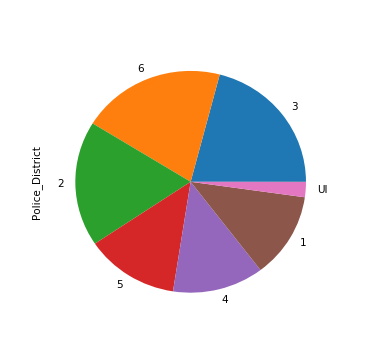

In [15]:
#using matplotlib magic to plot a pie chart of incidents by police district
%matplotlib notebook
calls['Police_District'].value_counts().plot(kind='pie')

<IPython.core.display.Javascript object>


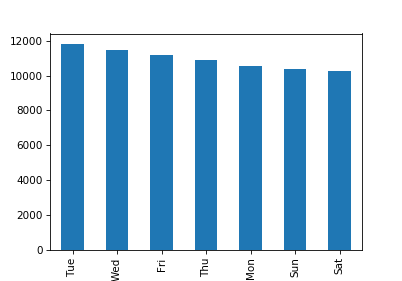

In [10]:
#using matplotlib magic to plot a bar chart of incidents by day of the week
%matplotlib notebook
calls['Day_of_Week'].value_counts().plot(kind='bar')

In [11]:
#using the pyproj library to reproject x,y coordinates from state plane zone II to WGS84 lat/long
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6722570,1992314
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

-121.43672656313065 38.63153998649104


In [12]:
calls_map = folium.Map(location=[38.58, -121.5], tiles=("https://api.mapbox.com/styles/v1/mapbox/streets-v10/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
           zoom_start=11,
          attr='Mapbox attribution')
marker_cluster = folium.MarkerCluster().add_to(calls_map)
coords_list = []
#to save on memory/time we only call the first 1,000 records to map
for name, row in stolen.iloc[:1000].iterrows():   
    x1, y1 =row['X_Coordinate'],row['Y_Coordinate']
    #converts each set coordinates from state plane to lat/long
    long, lat = transform(inProj,outProj,x1,y1)
    coords = (lat,long)
    #add the set of coordinates to the list
    coords_list.append(coords)
    folium.Marker([lat, long], popup="Day of the week was " + row['Day_of_Week']).add_to(marker_cluster)

#saves callsnew.html in the working directory
calls_map.save('callsnew.html')
calls_map

In [13]:
calls_heatmap = folium.Map(location=[38.58, -121.5], tiles='Stamen Toner', zoom_start=13)

#create a heatmap using the same data as above
calls_heatmap.add_child(plugins.HeatMap([[item[0], item[1]] for item in coords_list]))
calls_heatmap.save("heatmap.html")
calls_heatmap

In [14]:
stamen_watercolor = folium.Map(location=[38.58, -121.5], tiles='Stamen WaterColor', zoom_start=13)
stamen_watercolor.save("watermap.html")
stamen_watercolor